In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM, renderPDF
from pdf2image import convert_from_path

RESULT_NAME = "1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2"
figFolder = f'_results/{RESULT_NAME}/allstitchnet_figures'
os.makedirs(figFolder, exist_ok=True)

data = pd.read_csv(f'_results/{RESULT_NAME}.txt', names=['score','acc','macs','params','path','fragments'])

sns.set_theme()

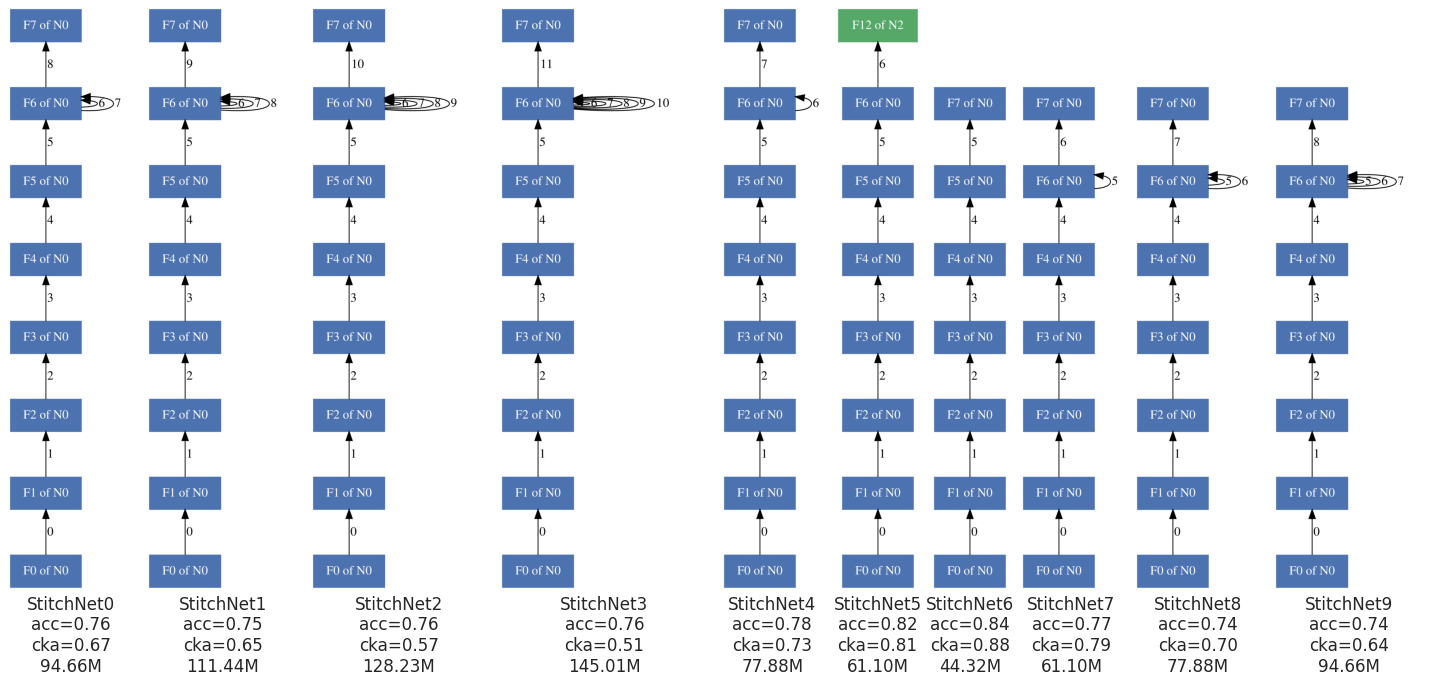

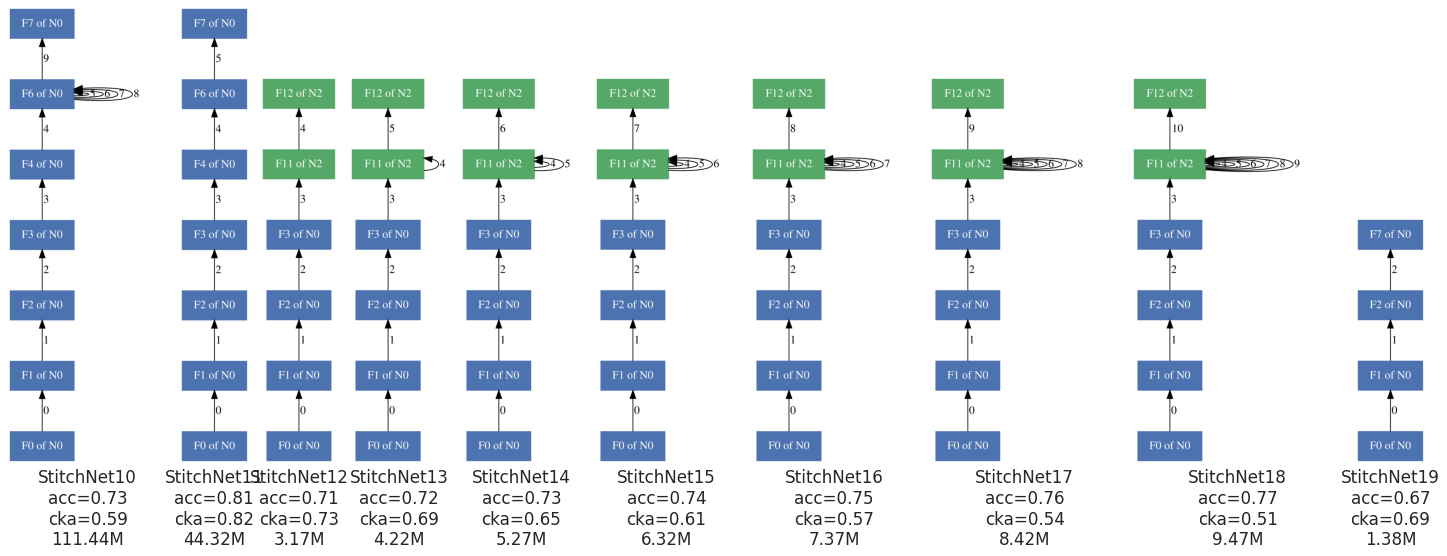

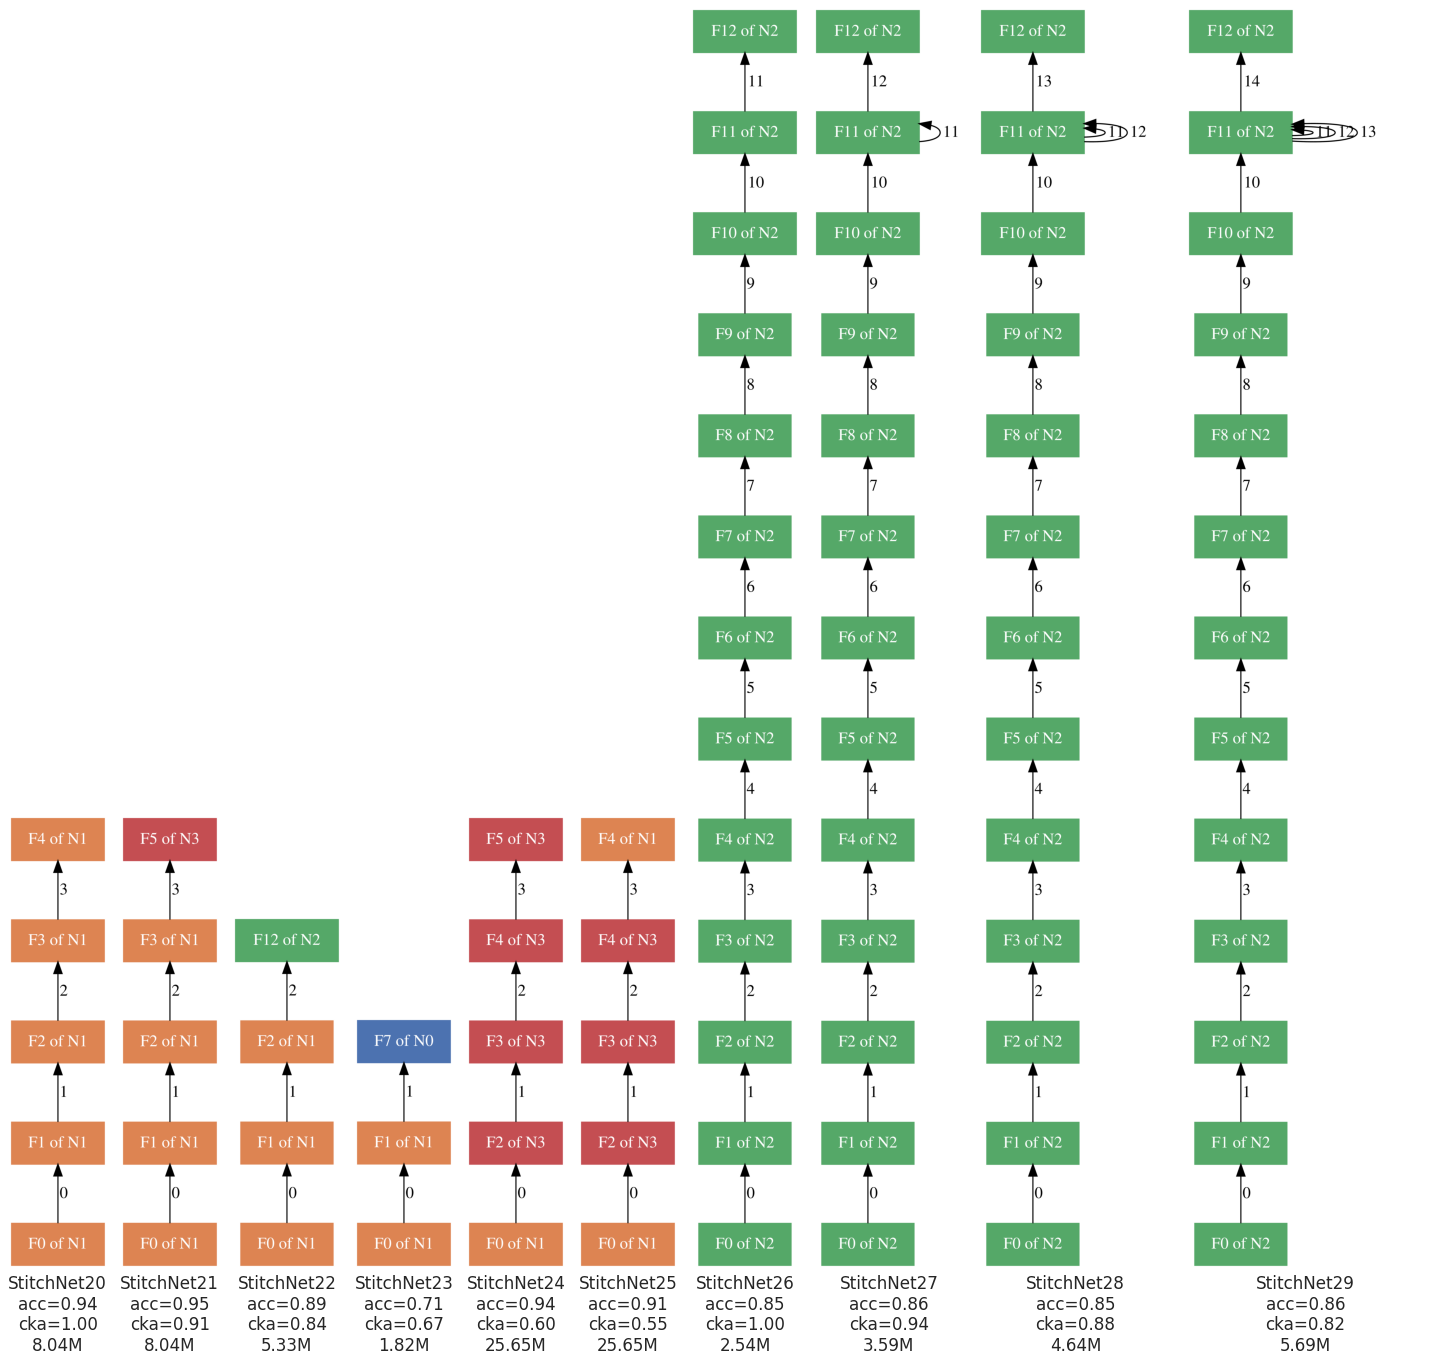

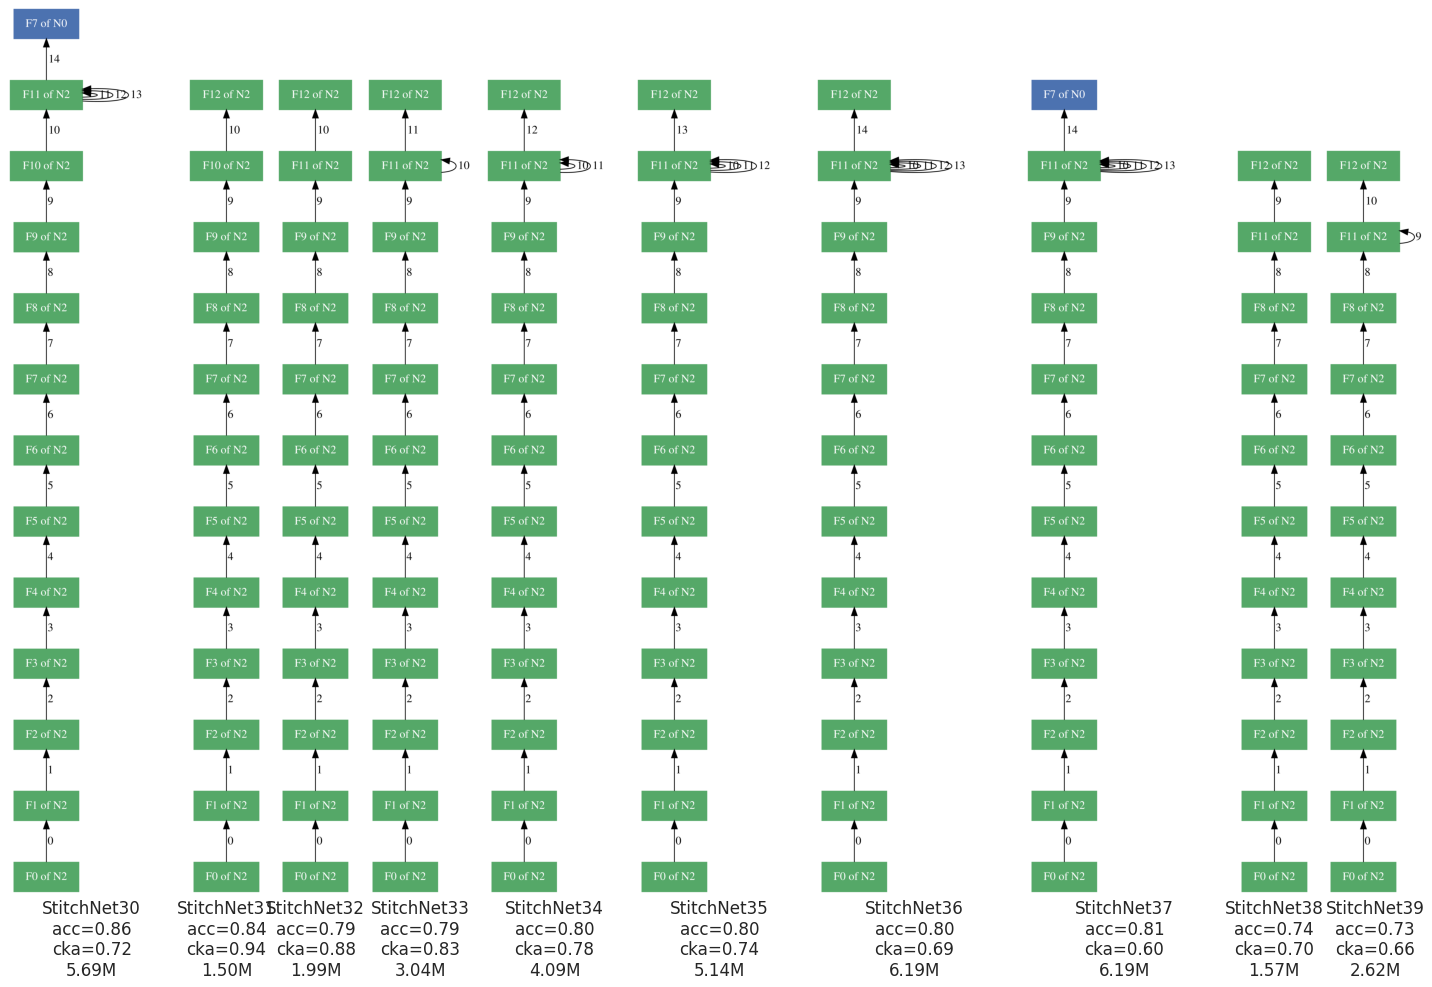

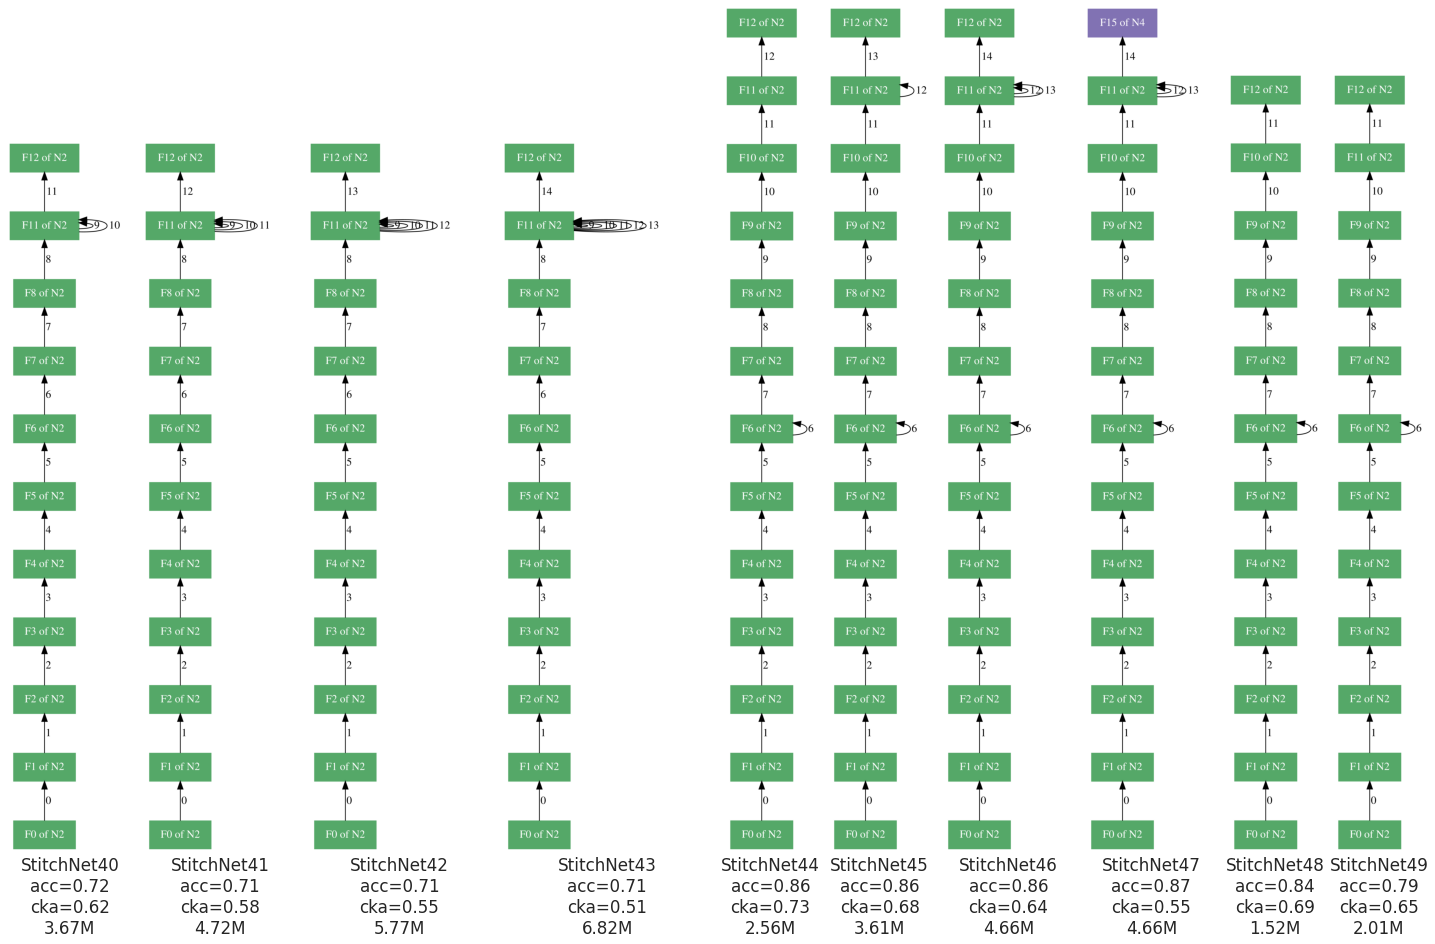

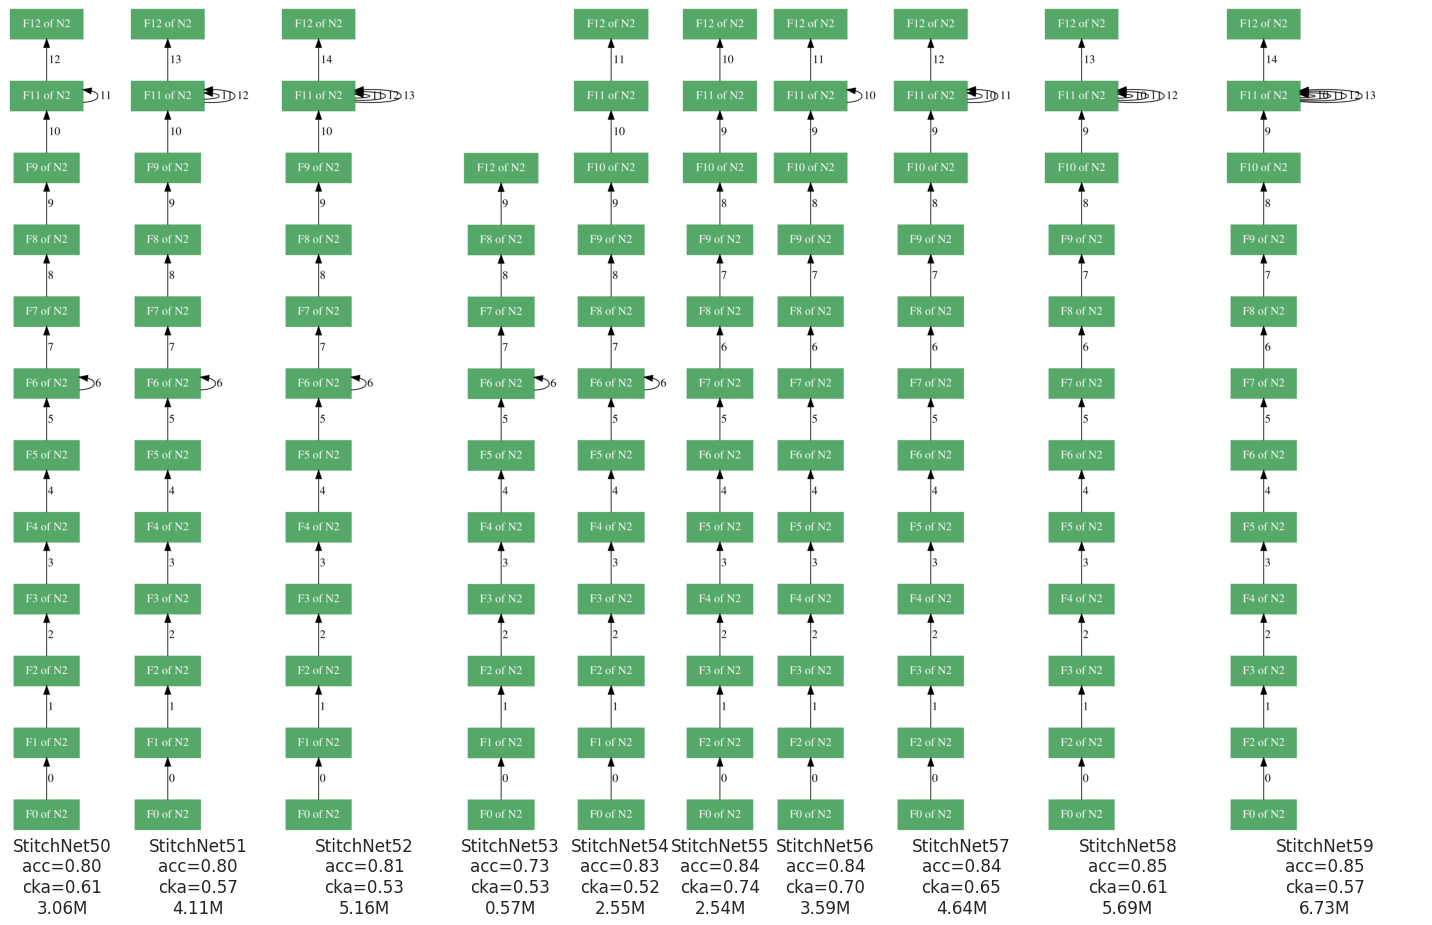

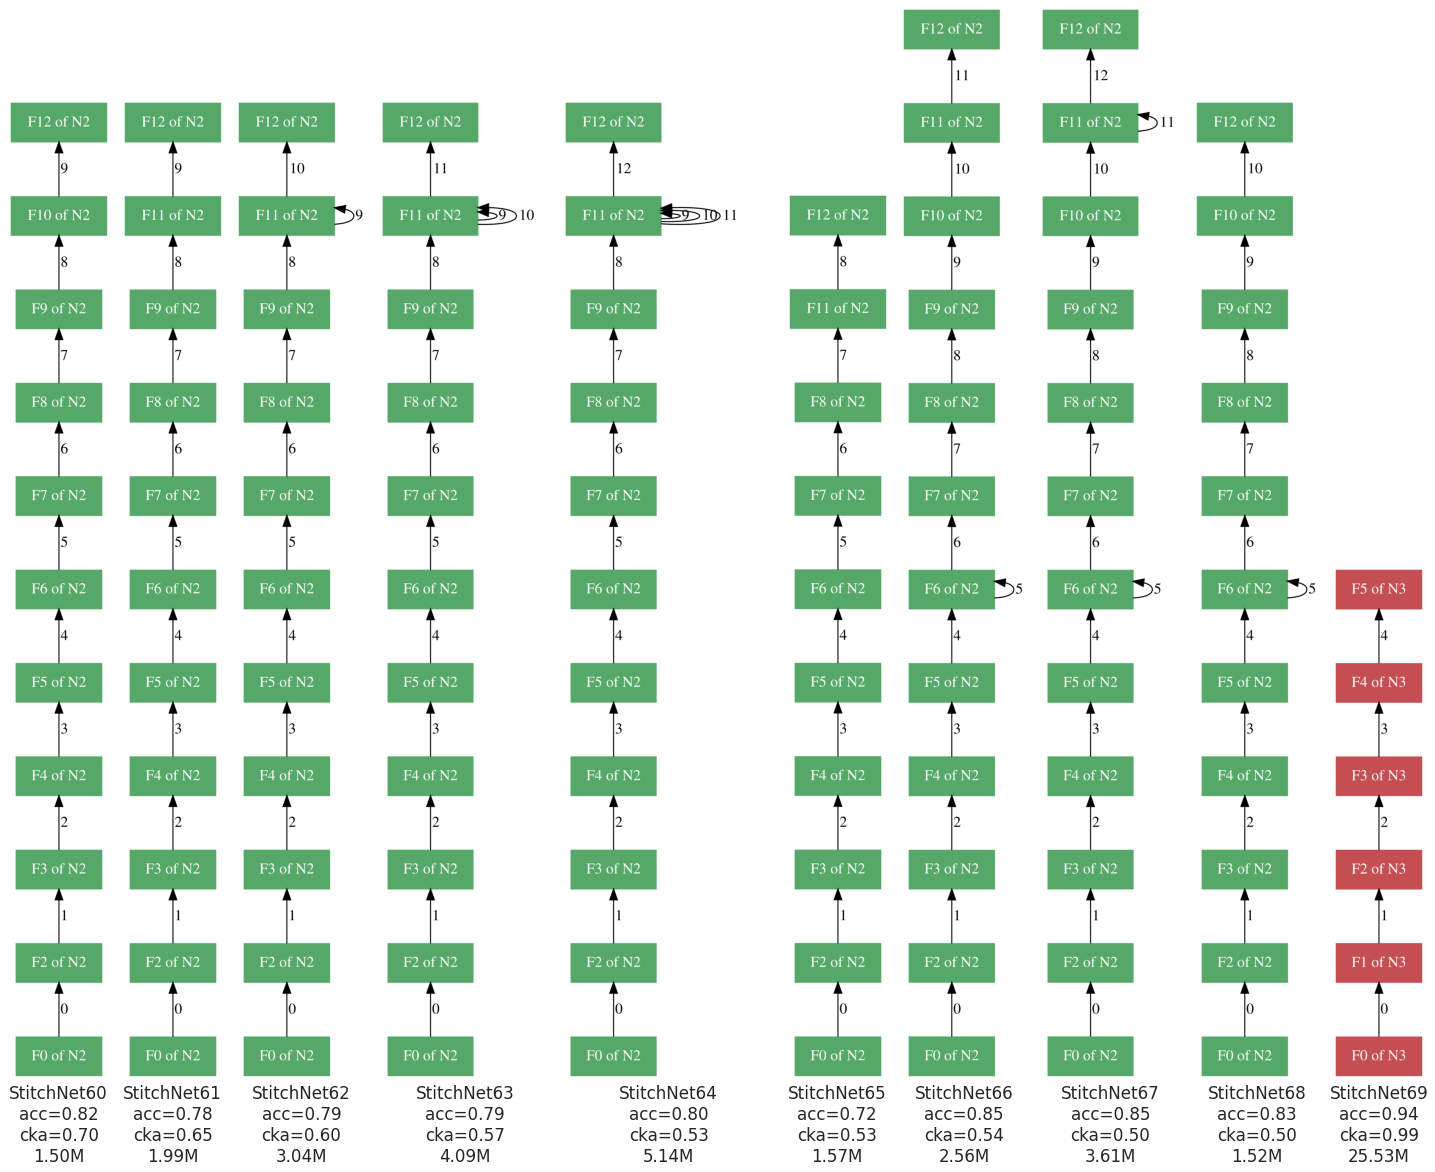

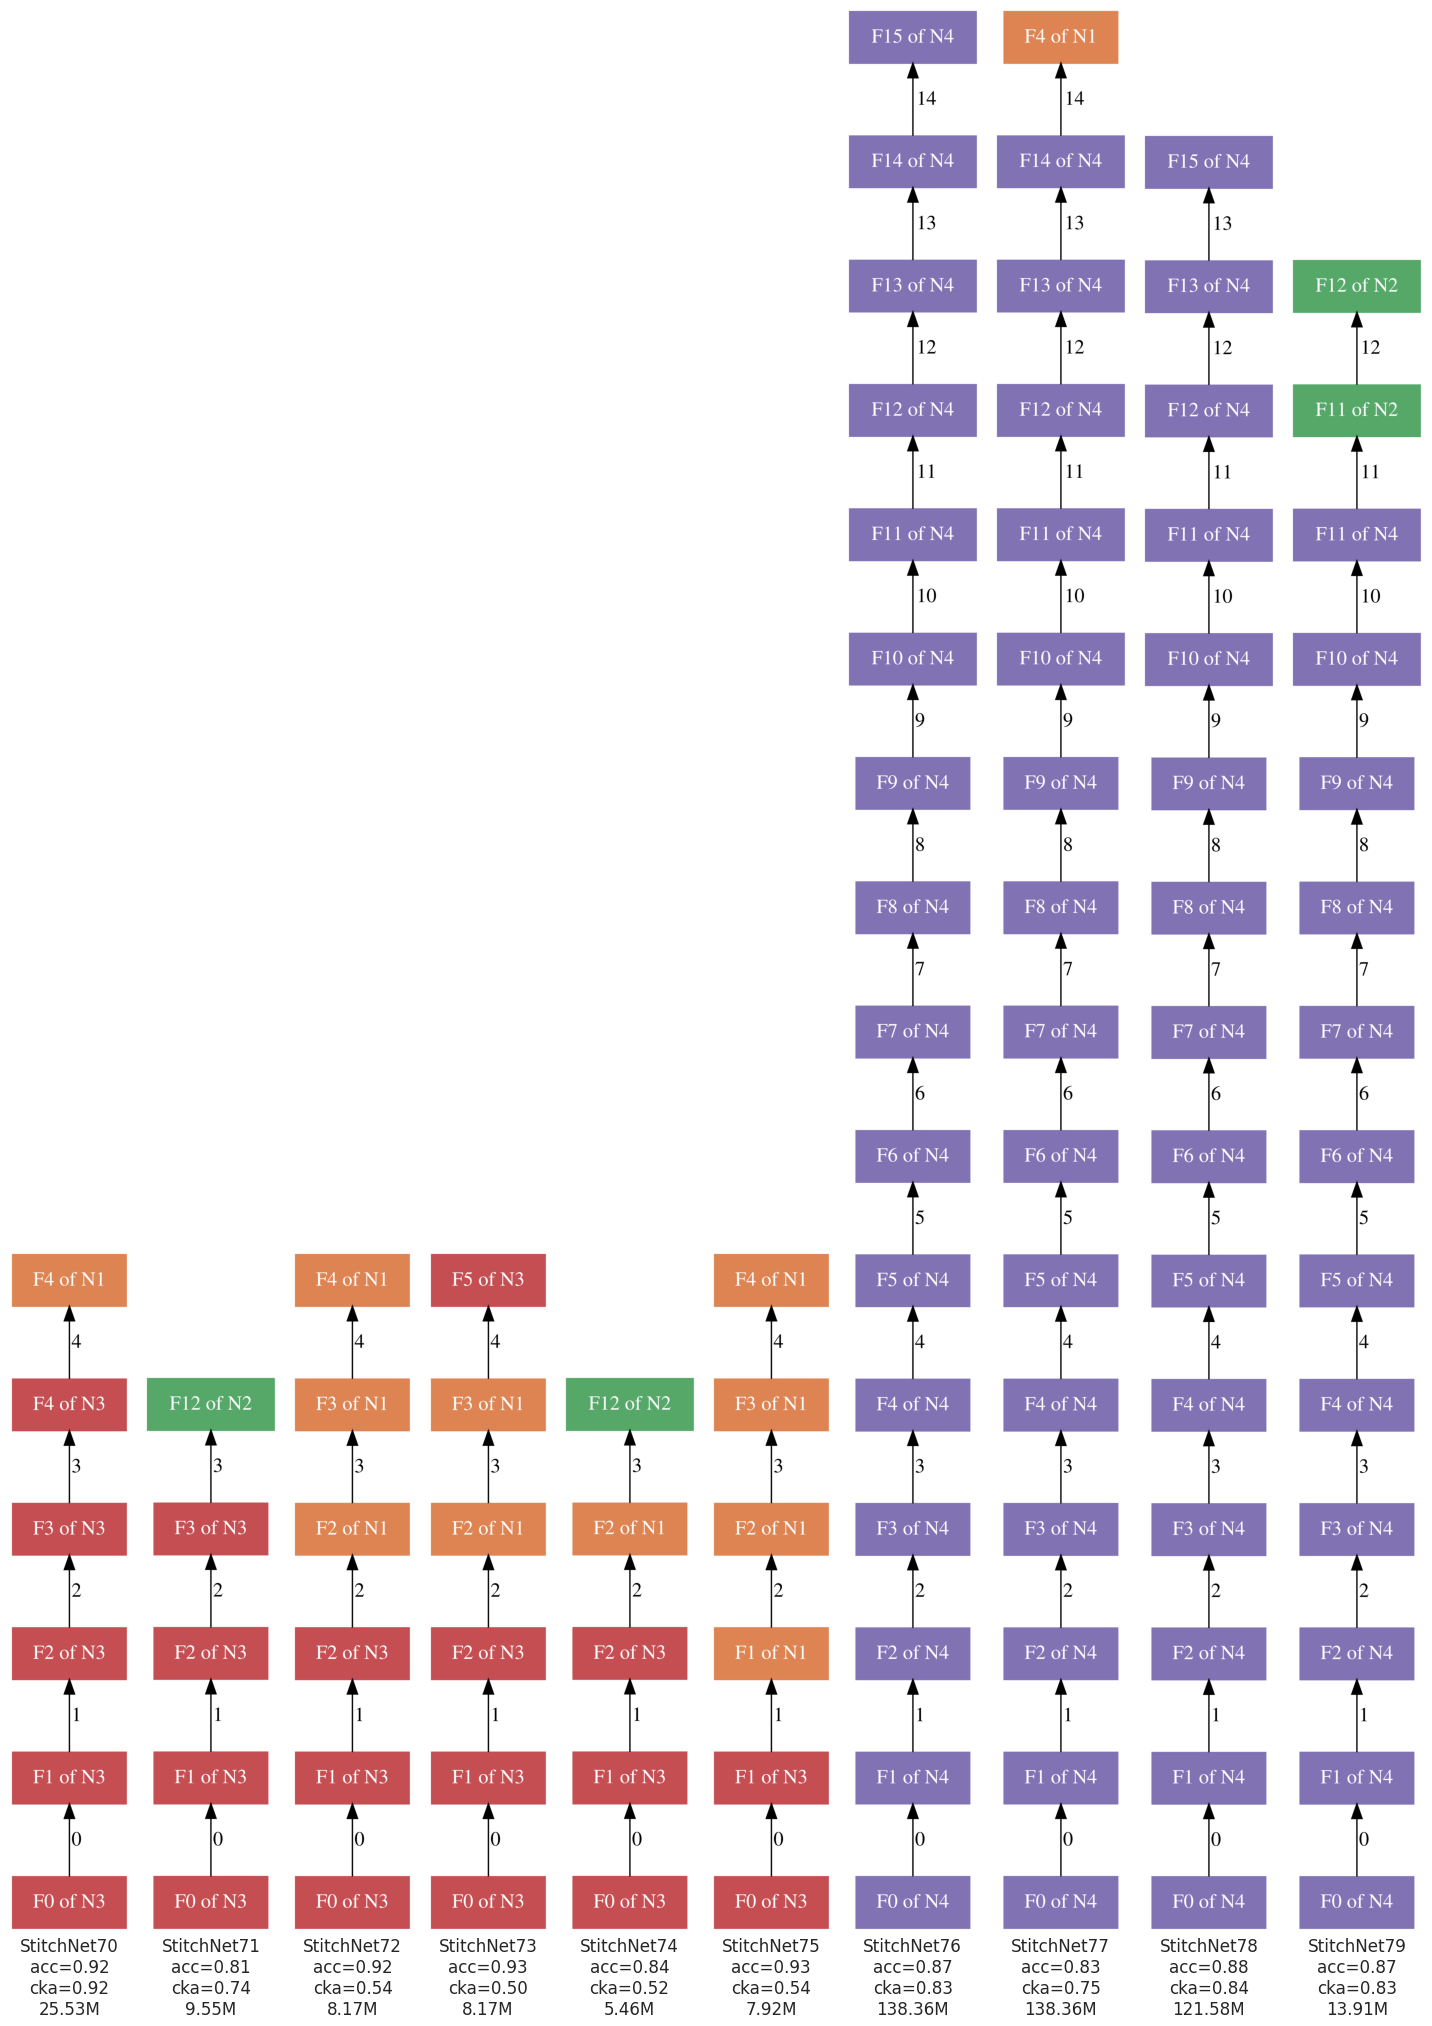

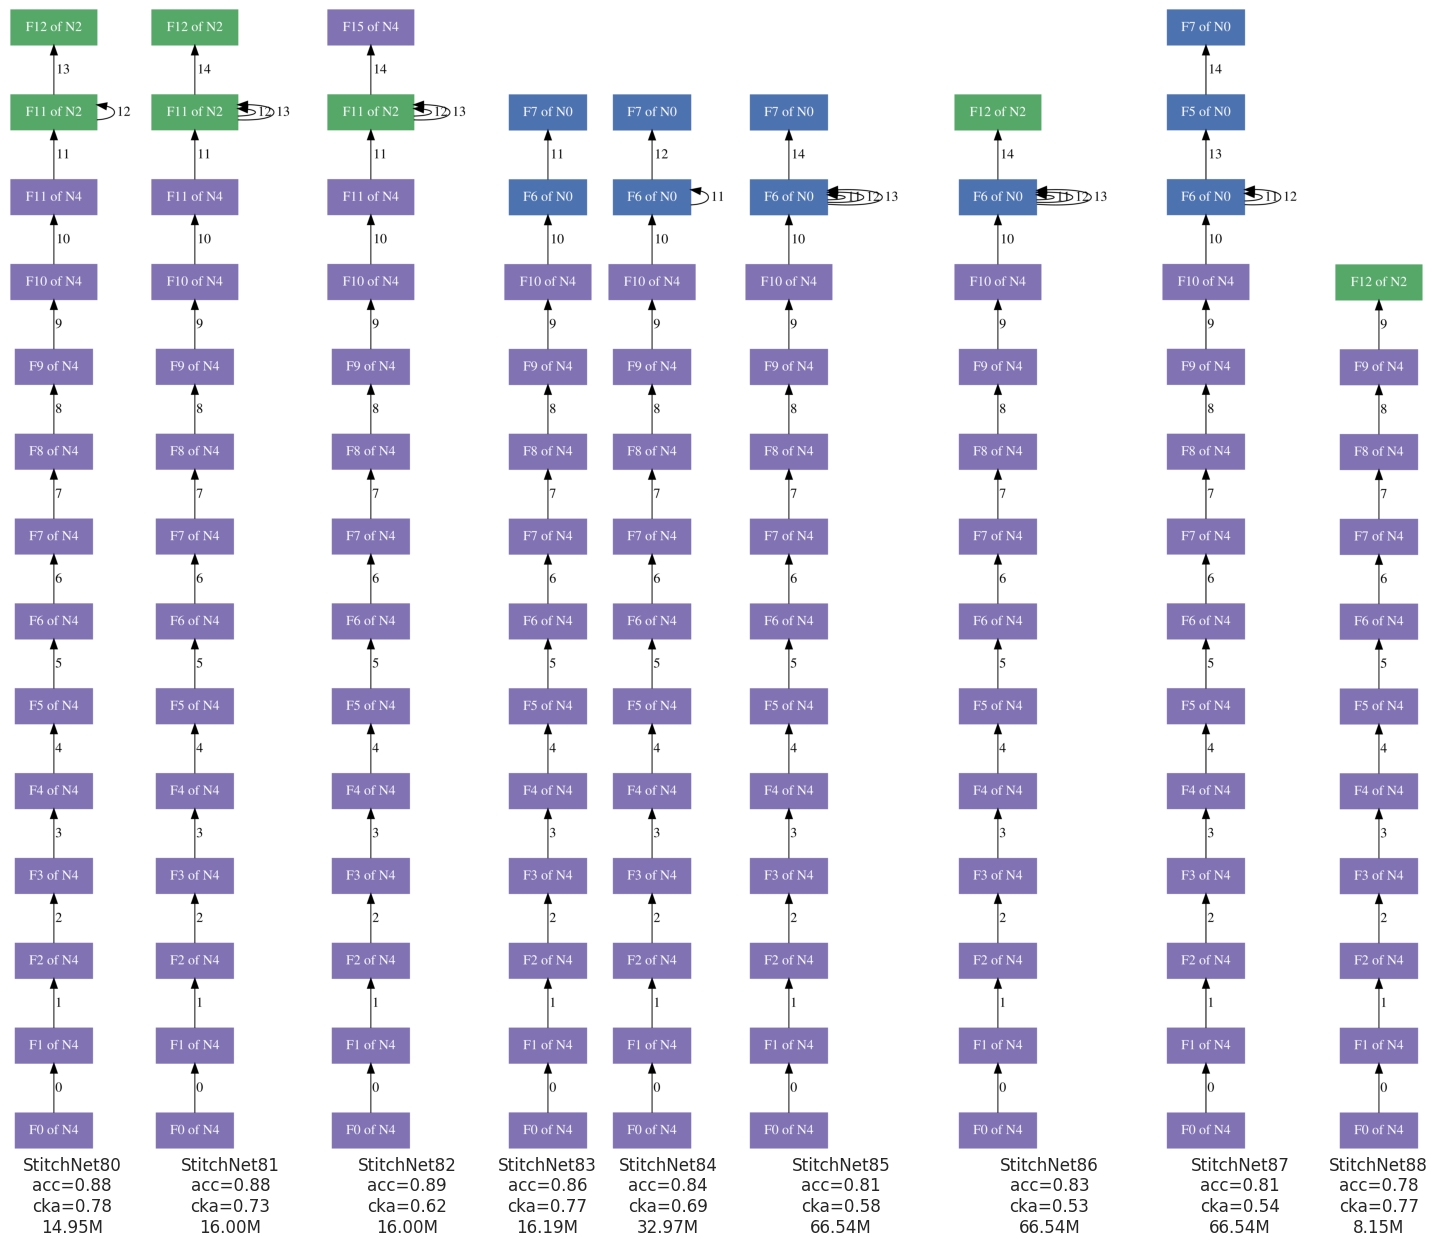

In [3]:
import os
sns.set(font_scale = 1.4)
def render_net(path):
    # if True or not os.path.exists(f"{path}.png"):
    drawing = svg2rlg(path)
    renderPDF.drawToFile(drawing, f'{path}.pdf')
    pages = convert_from_path(f'{path}.pdf', 600)
    pages[0].save(f'{path}.png', 'PNG')
    width = pages[0].width
    height = pages[0].height
    return width

def plot_net(ax, path, label):
    img = imread(path+'.png')
    ax.imshow(img)
    # ax.axis('off')
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    # Hide grid lines
    ax.grid(False)
    ax.set_xlabel(label)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
for k,idxs in enumerate(chunks(data.index,10)):
    widths = []
    for idx in idxs:
        netmeta = data.iloc[idx]
        width = render_net(netmeta.path)
        widths.append(width)

    width_ratios = np.array(widths).astype(float)/max(widths)
    # print(width_ratios)
    fig, axs = plt.subplots(1,len(idxs),figsize=[20, 70],gridspec_kw={'width_ratios': width_ratios})
    for ax in axs:
        ax.set_anchor('S')

    for i,idx in enumerate(idxs):
        netmeta = data.iloc[idx]
        pages = plot_net(axs[i],netmeta.path, f'StitchNet{idx}\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
    plt.tight_layout()
    plt.savefig(f'{figFolder}/stitchnets{k:03}.eps',bbox_inches='tight')
    # break